# Heart Disease Classification - 5 classifiers

In [26]:
!pip install lightgbm

     |████████████████████████████████| 2.0 MB 1.6 MB/s eta 0:00:01


In [ ]:
# IMPORTING LIBRARIES

In [27]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn import naive_bayes
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

In [ ]:
# LOADING DATASET

In [4]:
input_file1 = 'cleveland.txt'

In [5]:
md = pd.read_csv(input_file1, names = ['age', 'sex', 'cp', 'trestbps','chol','fbs','restecg', 'thalach','exang', 'old peak','slope','ca','thal','num'],na_values='?')
md.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,old peak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [ ]:
# ATTRIBUTE INFORMATION
#1. age - age in years 
#2. sex - sex (1 = male; 0 = female) 
#3. cp - chest pain type
#4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
#5. chol - serum cholestoral in mg/dl 
#6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
#7. restecg - resting electrocardiographic results 
#8. thalach - maximum heart rate achieved 
#9. exang - exercise induced angina (1 = yes; 0 = no) 
#10. oldpeak - ST depression induced by exercise relative to rest 
#11. slope - the slope of the peak exercise ST segment
#12. ca - number of major vessels (0-3) colored by flourosopy 
#13.thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
#14. num the predicted attribute


In [4]:
md.shape

(303, 14)

In [ ]:
# DATA PREPARATION

In [6]:
md = md.dropna()

In [6]:
print(len(md))

297


In [37]:
X = md.loc[:,'age':'thal']

In [38]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,old peak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [8]:
Y1 = md.loc[:,'num']

In [9]:
Y = Y1.ravel()

In [11]:
pd.Series(Y[:,]).value_counts()

0    160
1     54
2     35
3     35
4     13
dtype: int64

In [10]:
for i in range(len(Y)):
    if Y[i]>0:
        Y[i]=1

In [13]:
Y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [36]:
# DATA ANALYSIS

In [35]:
wykres = md['age']
Y2 = Y.T
d = {'num':Y2}
df = pd.DataFrame(d)
dt = pd.DataFrame(wykres)
dt['num'] = df

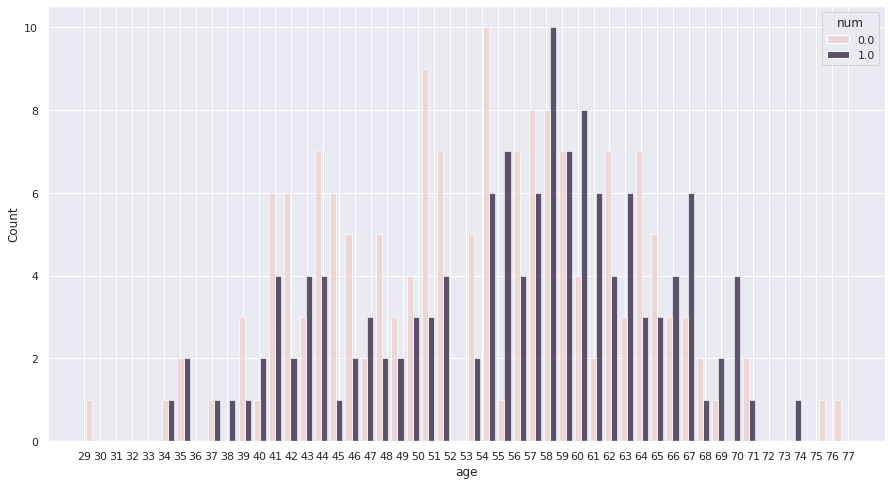

In [129]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=dt, x="age", hue="num", multiple="dodge", shrink=.8, bins=50)
ax.set_xticks(range(29,78))
plt.show()

In [14]:
pd.Series(Y[:,]).value_counts()

0    160
1    137
dtype: int64

In [ ]:
# MODELING

In [11]:
scaler  = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.93618065  0.69109474 -2.24062879 ...  2.26414539 -0.72197605
   0.65587737]
 [ 1.3789285   0.69109474  0.87388018 ...  0.6437811   2.47842525
  -0.89422007]
 [ 1.3789285   0.69109474  0.87388018 ...  0.6437811   1.41162482
   1.17257652]
 ...
 [ 1.48961547  0.69109474  0.87388018 ...  0.6437811   1.41162482
   1.17257652]
 [ 0.27205887  0.69109474  0.87388018 ...  0.6437811   0.34482438
   1.17257652]
 [ 0.27205887 -1.44697961 -1.20245913 ...  0.6437811   0.34482438
  -0.89422007]]


In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
# DECISION TREE CLASSIFIER

In [13]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)
clf.score(X_test, y_test)

[0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0
 0]


0.76

In [14]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[29 10]
 [ 8 28]]


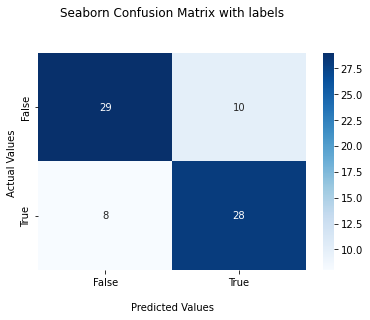

In [15]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# SVC - C-SUPPORT VECTOR

In [25]:
svc = svm.SVC(kernel='linear', C=1)
scores = model_selection.cross_val_score(svc,X,Y,cv=10)
print(scores)
print(scores.mean())

[0.86666667 0.83333333 0.8        0.93333333 0.8        0.76666667
 0.8        0.86206897 0.75862069 0.86206897]
0.8282758620689655


In [ ]:
# LOGISTIC REGRESSION

In [23]:
clf = linear_model.LogisticRegression(C=1e5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = model_selection.cross_val_score(clf,X,Y,cv=10)
print(scores)
print(scores.mean())

[0.86666667 0.86666667 0.76666667 0.96666667 0.8        0.76666667
 0.76666667 0.89655172 0.72413793 0.86206897]
0.8282758620689655


In [ ]:
# NAIVE BAYES

In [21]:
clf = naive_bayes.GaussianNB()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)
clf.score(X_test, y_test)

[0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 0]


0.8533333333333334

In [ ]:
# LGBMC CLASSIFIER

In [30]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.316504	valid_0's binary_logloss: 0.461323
[40]	training's binary_logloss: 0.208384	valid_0's binary_logloss: 0.452054
[60]	training's binary_logloss: 0.138345	valid_0's binary_logloss: 0.456471
[80]	training's binary_logloss: 0.100455	valid_0's binary_logloss: 0.485016
[100]	training's binary_logloss: 0.072468	valid_0's binary_logloss: 0.500385


/home/linux-user/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [31]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 1.0000
Testing accuracy 0.7600


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

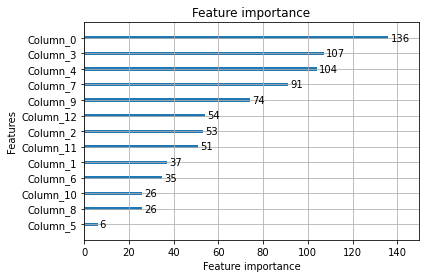

In [32]:
lgb.plot_importance(model)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

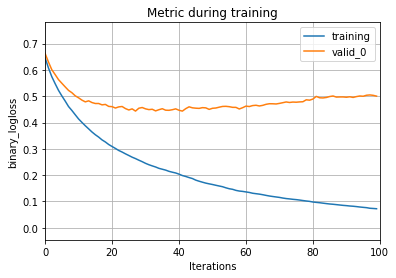

In [33]:
lgb.plot_metric(model)